# Database II Project
## by Lou GOUBIN, Théo JAOUDET and Clément DELRIEUX
- Link of the GitHub with all the datasets files : https://github.com/tatouti/DatabasePD
- Link of the dataset Erasmus Mobility : https://www.kaggle.com/datasets/donjoeml/erasmus-mobility-statistics-2014-2019/data
- Link of the dataset Global Cost of Living : https://www.kaggle.com/datasets/mvieira101/global-cost-of-living
- Link of the World University Rankings : https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023

### Introduction to Erasmus +
The Erasmus program is a student and teacher exchange program, between universities, European schools and educational establishments around the world. Each year, thousands of participants from more than 30 countries go abroad to spend a semeter or more in another country.
### Data description : (Expliquer en une ligne chaque dataset)
1. **Erasmus Mobility** :
This dataset contains the raw data for Erasmus+ mobility for students and staff from 2014 to 2019. We are only working on the data about student during 2019-2020.
2. **Global Cost of Living** : 
This dataset contains information about the cost of living in almost 5000 cities across the world.
3. **World University Ranking** : 
The World University Rankings provide the list of the world’s best universities after juging 13 calibrated performance indicators. We are only working on the ranking of 2019.

### Objectives of this Data Analysis : 
We want first to analyse each dataset individually to get the dynamic of the data, and then we want to mix the datasets informations in order to see what influences the destinations of the students.


## I. Start of the Data Processing

### Import of the libraries 

In [2]:
# Pandas for data processing 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Library for numpy
import numpy as np
from numpy import random

# Library to get countries codes
import pycountry

# Regex for string values
import re

# Library to read zip file
import zipfile

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for dataframe display
from IPython.display import display, HTML

# Import unidecode to remove accents
from unidecode import unidecode

# Import library for organization name matching

### 1. Loading and cleaning of the first dataset  -> Erasmus Mobility Statistics

##### Keeping only the data for the 2019-2020 and exporting a new csv

In [3]:
"""
zf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))
erasmus_df = erasmus_df[erasmus_df['Academic Year']=='2019-2020']
compression_opts = dict(method='zip',
                        archive_name='Erasmus_mobility_statistics_2019_2020.csv')  
erasmus_df.to_csv('Erasmus_mobility_statistics_2019_2020.zip', index=False,
          compression=compression_opts) 
"""

"\nzf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') \nerasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))\nerasmus_df = erasmus_df[erasmus_df['Academic Year']=='2019-2020']\ncompression_opts = dict(method='zip',\n                        archive_name='Erasmus_mobility_statistics_2019_2020.csv')  \nerasmus_df.to_csv('Erasmus_mobility_statistics_2019_2020.zip', index=False,\n          compression=compression_opts) \n"

##### Using the new data created

In [4]:
zf = zipfile.ZipFile('Datasets/Erasmus_mobility_statistics_2019_2020.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2019_2020.csv'))
pd.set_option('display.max_columns', None)

# We drop colomns that we won't use
erasmus_df=erasmus_df.dropna()
erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

print(erasmus_df.info(verbose=False))

/tmp/ipykernel_3547/971002723.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2019_2020.csv'))


<class 'pandas.core.frame.DataFrame'>
Index: 736353 entries, 0 to 736433
Columns: 21 entries, Academic Year to Participants
dtypes: float64(2), object(19)
memory usage: 123.6+ MB
None


In [5]:
erasmus_df

,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2019-2020,2019-03,2019-04,33.0,European Voluntary Service - Partner Countries,? Unknown ?,EE,??? - ? Unknown ?,Female,Learner,No,No,No,18,EE,TALLINN,MTÜ NOORTEVAHETUSE ARENGU ÜHING ESTYES,RU,Nizhny Novgorod,Interregional youth social movement of support...,1.0
1,2019-2020,2019-02,2019-03,56.0,European Voluntary Service - Partner Countries,? Unknown ?,IT,??? - ? Unknown ?,Male,Learner,No,Yes,No,29,IT,TRAPPETO,CESIE,UK,Cardiff,Language Academy Wales,1.0
2,2019-2020,2019-04,2019-04,6.0,Structured Courses/Training Events,Languages,AT,??? - ? Unknown ?,Female,Staff,No,No,No,39,AT,Hollabrunn,HTL Für Lebensmitteltechnologie-Lebensmittelsi...,EL,Heraklion,Institut für europäische Lehrerfortbildung UG ...,1.0
3,2019-2020,2019-02,2019-02,15.0,Structured Courses/Training Events,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,No,27,AT,Weiz,BHAK/BHAS Weiz,IE,Dublin,Atlantic Language Dublin,1.0
4,2019-2020,2019-02,2019-02,5.0,Structured Courses/Training Events,Education,AT,??? - ? Unknown ?,Female,Staff,No,No,No,26,AT,Linz,Bundesbildungsanstalt für Elementarpädagogik,MT,St.Julian's,Executive Training Institute Ltd.,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736429,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,24,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
736430,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,32,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
736431,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,No,37,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
736432,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Male,Staff,No,No,No,41,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0


#### Cleaning and dropping more columns

In [6]:
def drop_ages(x):
    if x == '-':
        return np.nan
    if int(x) > 70 or int(x) < 13:
        return np.nan
    else:
        return x
    
def getCountry(x):
    country = pycountry.countries.get(alpha_2=x)
    if country != None:
        return country.name
    else:
        return x

def toBool(x):
    if x == 'Yes':
        return 'true'
    else:
        return 'false'
    
def isStudent(x):
    if x == 'Staff':
        return 'false'
    else:
        return 'true'

def clean_name (name) :
    cleaned_name = unidecode(re.sub('[^a-zA-Z0-9 ]', '', name))
    cleaned_name = re.sub('\s+', '_', cleaned_name) 
    return cleaned_name

<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3547/121662241.py:30: SyntaxWarning: invalid escape sequence '\s'
  cleaned_name = re.sub('\s+', '_', cleaned_name)


In [7]:
#Cleaning the columns
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)
erasmus_df=erasmus_df.dropna()

#Remove columns if present
erasmus_df = erasmus_df.drop(columns = ['Activity (mob)','GroupLeader', 'Education Level', 'Participants','Academic Year', 'Mobility Start Month', 'Mobility End Month' ])

erasmus_df = erasmus_df[erasmus_df['Mobility Duration']<=500]

erasmus_df = erasmus_df[erasmus_df['Participant Nationality'] != '-']

erasmus_df['Sending City'] = erasmus_df['Sending City'].str.capitalize().map(clean_name)
erasmus_df['Receiving City'] = erasmus_df['Receiving City'].str.capitalize().map(clean_name)
erasmus_df['Sending Organization'] = erasmus_df['Sending Organization'].str.title().map(clean_name)
erasmus_df['Receiving Organization'] = erasmus_df['Receiving Organization'].str.title().map(clean_name)
erasmus_df['Field of Education'] = erasmus_df['Field of Education'].replace("? Unknown ?","Other")
erasmus_df['Participant Profile'] = erasmus_df['Participant Profile'].map(isStudent)

#Datatype changes
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].astype('int')
erasmus_df['Mobility Duration'] = erasmus_df['Mobility Duration'].astype('int')
erasmus_df['Special Needs'] = erasmus_df['Special Needs'].map(toBool)
erasmus_df['Fewer Opportunities'] = erasmus_df['Fewer Opportunities'].map(toBool)

# Country name changes
erasmus_df['Sending Country Code'] = erasmus_df['Sending Country Code'].map(getCountry).replace({"UK":"United Kingdom"}).map(clean_name)
erasmus_df['Receiving Country Code'] = erasmus_df['Receiving Country Code'].map(getCountry).replace({"UK":"United Kingdom"}).map(clean_name)
erasmus_df['Participant Nationality'] = erasmus_df['Participant Nationality'].map(getCountry).replace({"UK":"United Kingdom"}).map(clean_name)
erasmus_df = erasmus_df.rename(columns={'Sending Country Code':'Sending Country',
                                        'Receiving Country Code':'Receiving Country',
                                        'Participant Profile':'isStudent'})

citiesInSet = set(erasmus_df['Sending City'].unique()) | set(erasmus_df['Receiving City'].unique())
citiesInSet = list(citiesInSet)

countriesInSet = set(erasmus_df['Sending Country'].unique()) | set(erasmus_df['Receiving Country'].unique())
countriesInSet = list(countriesInSet)

erasmus_df

,Mobility Duration,Field of Education,Participant Nationality,Participant Gender,isStudent,Special Needs,Fewer Opportunities,Participant Age,Sending Country,Sending City,Sending Organization,Receiving Country,Receiving City,Receiving Organization
0,33,Other,Estonia,Female,true,false,false,18,Estonia,Tallinn,Mt_Noortevahetuse_Arengu_hing_Estyes,Russian_Federation,Nizhny_novgorod,Interregional_Youth_Social_Movement_Of_Support...
1,56,Other,Italy,Male,true,false,true,29,Italy,Trappeto,Cesie,United_Kingdom,Cardiff,Language_Academy_Wales
2,6,Languages,Austria,Female,false,false,false,39,Austria,Hollabrunn,Htl_Fr_LebensmitteltechnologieLebensmittelsich...,EL,Heraklion,Institut_Fr_Europische_Lehrerfortbildung_Ug_Ha...
3,15,Teacher training with subject specialization,Austria,Female,false,false,false,27,Austria,Weiz,BhakBhas_Weiz,Ireland,Dublin,Atlantic_Language_Dublin
4,5,Education,Austria,Female,false,false,false,26,Austria,Linz,Bundesbildungsanstalt_Fr_Elementarpdagogik,Malta,Stjulians,Executive_Training_Institute_Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736429,7,Other,Turkey,Female,false,false,true,24,United_Kingdom,London,Youth_Innovation_Ltd,United_Kingdom,London,Youth_Innovation_Ltd
736430,7,Other,United_Kingdom,Female,false,false,true,32,United_Kingdom,London,Youth_Innovation_Ltd,United_Kingdom,London,Youth_Innovation_Ltd
736431,7,Other,United_Kingdom,Female,false,false,true,37,United_Kingdom,London,Youth_Innovation_Ltd,United_Kingdom,London,Youth_Innovation_Ltd
736432,7,Other,United_Kingdom,Male,false,false,false,41,United_Kingdom,London,Youth_Innovation_Ltd,United_Kingdom,London,Youth_Innovation_Ltd


In [8]:
print("There are  {}  exchange students and staff in our Dataset".format(len(erasmus_df))) 
print("There are {} features (columns) in our dataset".format(len(erasmus_df.columns)))

There are  644569  exchange students and staff in our Dataset
There are 14 features (columns) in our dataset


### 2. Loading and cleaning of the second dataset  -> Cost of living

In [9]:
zf = zipfile.ZipFile('Datasets/CostOfLiving.zip') 
cof = pd.read_csv(zf.open('cost-of-living.csv'))
pd.set_option('display.max_columns', None)

# Keep only usefull columns
listToKeep = ['city','country','x1','x3','x10','x13','x4','x25','x24','x6',
              'x11','x20','x23','x27','x28','x29',
              'x36','x37','x38','x41','x44','x48','x54']
cof = cof[listToKeep]

# Rename all the columns
nameColumns = ['City','Country','Meal','McDo','Bread','Cheese','Bar Beer','Market Beer','Market Wine','Cappucino',
               'Rice','Potatoes','Water','Cigarettes','One Ticket','Monthly Pass',
               'Basics','Mobile','Internet','Cinema','Jeans','Apartment','Net Salary']
cof = cof.set_axis(nameColumns, axis=1)

# Drop the cities with no rent
cof = cof[cof['Apartment'].isna()==False]

# Drop not used columns
cof = cof.drop(columns=['Meal','Market Beer','Rice','Potatoes','Water',
                        'One Ticket','Monthly Pass','Mobile','Internet','Cinema','Jeans'])

# Keep only the cities present in the erasmus dataset by using clean_name function
cof['City'] = cof['City'].map(clean_name)
cof = cof[cof['City'].isin(citiesInSet)]

cof

,City,Country,McDo,Bread,Cheese,Bar Beer,Market Wine,Cappucino,Cigarettes,Basics,Apartment,Net Salary
0,Seoul,South Korea,6.15,2.85,11.54,3.07,15.36,3.93,3.46,182.13,742.54,2689.62
1,Shanghai,China,5.69,2.61,18.35,1.14,14.24,3.98,3.56,66.00,1091.93,1419.87
2,Guangzhou,China,4.98,1.63,9.00,0.85,11.39,3.54,3.70,59.65,533.28,1211.68
3,Mumbai,India,3.68,0.50,5.88,2.46,9.83,2.48,4.30,43.57,522.40,640.81
5,Dhaka,Bangladesh,4.88,0.67,7.21,5.85,5.36,1.95,3.12,37.06,142.09,280.73
...,...,...,...,...,...,...,...,...,...,...,...,...
4856,Bernolakovo,Slovakia,6.32,1.05,6.32,2.11,5.27,2.11,5.27,210.75,632.25,843.00
4878,Castlegar,Canada,9.26,1.85,11.12,4.45,NaN,3.15,11.67,164.23,1278.48,3186.94
4912,Manavgat,Turkey,3.76,0.18,7.51,2.15,NaN,2.33,1.29,58.86,259.38,375.66
4921,Richmond,Australia,NaN,2.72,7.88,NaN,NaN,NaN,20.39,84.02,2242.61,NaN


### 3. Loading and cleaning of the third dataset  -> University rankings

In [10]:
def calculateGenderGap(x):
    gap=0
    x = str(x)
    if(x!='nan'):
        x = x.split(' : ')
        gap = int(x[0])-int(x[1])
    return gap
# Negative result means there are more male
# Positive result means there are more female

def rankRange(x):
    if(x<=200):
        x = "1-200"
    elif(x<=400):
        x = "201-400" 
    elif(x<=600):
        x = "401-600" 
    elif(x<=800):
        x = "601-800" 
    elif(x<=1000):
        x = "801-1000"    
    else:
        x = "1001+"  
    return x

def score_overalls_avg(x):
    x=x.strip().split('–')
    somme=0
    for i in x:somme+=float(i)
    return (somme)/len(x)

In [11]:
zf = zipfile.ZipFile('Datasets/UniRanking.zip') 
rank2019 = pd.read_csv(zf.open('2019_rankings.csv'))
pd.set_option('display.max_columns', None)

# Drop some columns
rank2019 = rank2019.loc[:, ~rank2019.columns.str.endswith('_rank')]
rank2019 = rank2019.drop(columns=['aliases','subjects_offered','closed','unaccredited', 'rank_order', 'rank'])
rank2019['genderGap'] = rank2019['stats_female_male_ratio'].map(calculateGenderGap)
rank2019['scores_overall'] = rank2019['scores_overall'].map(score_overalls_avg)

# Add a column (id + 1)
rank2019.insert(0, 'rank', range(1, 1 + len(rank2019)))

rank2019['name'] = rank2019['name'].map(clean_name)
rank2019['location'] = rank2019['location'].map(clean_name)


# Add a column
rank2019.insert(2,'rank_range',rank2019['rank'].map(rankRange))

#Only keep the universities in countries present in the erasmus dataset
rank2019 = rank2019[rank2019['location'].isin(countriesInSet)]

rank2019

,rank,name,rank_range,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
0,1,University_of_Oxford,1-200,96.00,91.8,99.5,99.1,67.0,96.3,United_Kingdom,"20,300",11.0,40%,46 : 54,-8
1,2,University_of_Cambridge,1-200,94.80,92.1,98.8,97.1,52.9,94.3,United_Kingdom,"18,750",10.9,37%,46 : 54,-8
2,3,Stanford_University,1-200,94.70,93.6,96.8,99.9,64.6,79.3,United_States,"15,878",7.4,23%,43 : 57,-14
3,4,Massachusetts_Institute_of_Technology,1-200,94.20,91.9,92.7,99.9,87.6,89.0,United_States,"11,231",8.7,34%,38 : 62,-24
4,5,California_Institute_of_Technology,1-200,94.10,94.5,97.2,99.2,88.2,62.3,United_States,"2,255",6.5,29%,33 : 67,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1251,Yamaguchi_University,1001+,14.35,21.1,10.0,11.5,43.0,23.5,Japan,"10,569",10.8,4%,36 : 64,-28
1251,1252,Yanshan_University,1001+,14.35,15.5,10.9,9.1,52.5,15.0,China,"32,183",16.3,1%,39 : 61,-22
1252,1253,Yarmouk_University,1001+,14.35,20.0,8.1,6.9,35.4,49.4,Jordan,"35,320",34.5,9%,61 : 39,22
1254,1255,Yeditepe_University,1001+,14.35,14.6,9.8,10.1,49.7,22.1,Turkey,"19,705",18.6,2%,55 : 45,10


## II. Data Analysis

### 1. Erasmus Mobility analysis

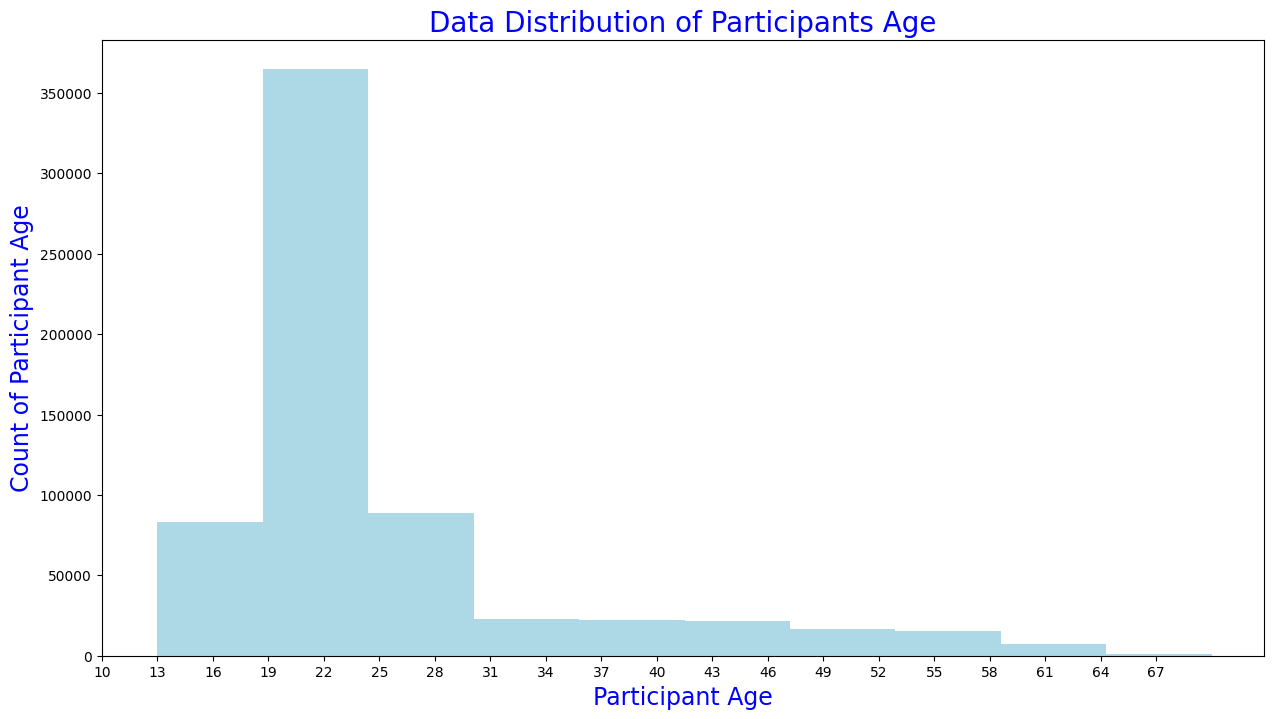

In [12]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Participant Age'],color="lightblue")

axs.set_title("Data Distribution of Participants Age", color="blue",fontsize=20)
axs.set_xticks([i for i in range(10,70,3)])
axs.set_xlabel("Participant Age", color="blue", fontsize=17)
axs.set_ylabel("Count of Participant Age", color="blue", fontsize=17)

plt.show()

We can see that the majority of the participants are between 16 and 28 years old. This fits well with the first meaning of the Erasmus project which was to allow young students to discover Europe and its culture.

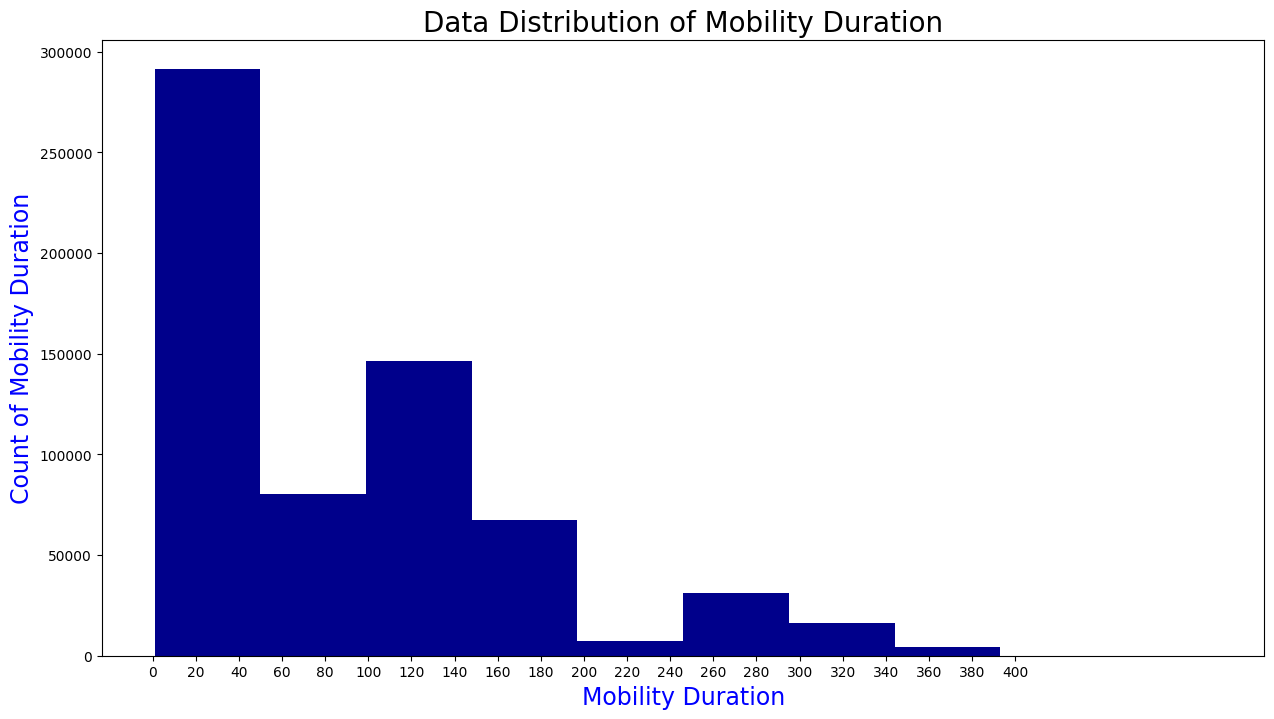

In [13]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Mobility Duration'],color="darkblue")

axs.set_title("Data Distribution of Mobility Duration", fontsize=20)
axs.set_xticks([i for i in range(0,420,20)])
axs.set_xlabel("Mobility Duration", color="blue", fontsize=17)
axs.set_ylabel("Count of Mobility Duration", color="blue", fontsize=17)

plt.show()

Surprisingly, we can see that most of the mobilities are just lasting around one to two months. We would be expecting that the mean duration should be around 6 months since it is the most famous one in univerisities. Let's investigate this result with the tab bellow

In [14]:
erasmus_df[['Participant Age','Mobility Duration']].groupby('Participant Age').agg(['count','mean']).head(20)

Mobility Duration            
                            count        mean
Participant Age                              
13                           1155    7.643290
14                           2203    7.997730
15                           4643   10.681025
16                          13755   17.372374
17                          27015   22.319748
18                          34533   35.089364
19                          40330   87.868832
20                          73813  135.441928
21                          83395  131.198465
22                          69308  123.678060
23                          56684  119.904453
24                          41330  112.012920
25                          28203  101.476190
26                          19190   89.764252
27                          14088   76.280309
28                          10937   64.906739
29                           9329   54.078358
30                           7194   48.403253
31                           5834   42.729859
32                           4941   37.343250

When we look at the duration for each ages, we understand that between 20 and 25 years old, the mean duration is around 4 months, while all the other ages have shorter durations. This explains why we had the graph before, and that the 'normal' duration that we know for unversities student is actually kind of an isolated duration for thoses students. That's why students are lucky to have thoses long term periods that really allow them to enjoy their stay.

In [15]:
display(erasmus_df.groupby('Participant Nationality').count().sort_values(by='Mobility Duration',ascending=False).head().isStudent.to_frame(),
        erasmus_df.groupby('Sending Country').count().sort_values(by='Mobility Duration',ascending=False).head().isStudent.to_frame(),
        erasmus_df.groupby('Receiving Country').count().sort_values(by='Mobility Duration',ascending=False).head().isStudent.to_frame())


,isStudent
Participant Nationality,
France,78540
Germany,72071
Spain,64531
Italy,63794
Turkey,33110


,isStudent
Sending Country,
France,81458
Germany,74178
Spain,66041
Italy,64187
Turkey,33102


,isStudent
Receiving Country,
Spain,89798
Italy,59769
Germany,55275
United_Kingdom,49297
France,42334


We can see that in 2019 the students that travelled the most were French students. But while France sends a lot of students, they don't receive a lot of foreign students. In the other side, we can see that Spain receives a lot of students. The obvious reason would be the hot climate and the party life, with is important for young students. 

In [16]:
receivingCity = erasmus_df.groupby(['Receiving City','Receiving Country']).count().sort_values(by='Mobility Duration',ascending=False).head().isStudent.to_frame()
display(erasmus_df.groupby(['Sending City','Sending Country']).count().sort_values(by='Mobility Duration',ascending=False).head().isStudent.to_frame(),
        receivingCity)

,,isStudent
Sending City,Sending Country,
Paris,France,7980
Madrid,Spain,6893
Berlin,Germany,6809
Budapest,Hungary,5692
Roma,Italy,5298


,,isStudent
Receiving City,Receiving Country,
Barcelona,Spain,10778
Berlin,Germany,9808
London,United_Kingdom,9471
Dublin,Ireland,9270
Madrid,Spain,8970


In [17]:
receivingUni = erasmus_df.groupby('Receiving Organization').count().sort_values(by='Mobility Duration',ascending=False).head().isStudent
display(receivingUni.to_frame(),
        erasmus_df.groupby('Sending Organization').count().sort_values(by='Mobility Duration',ascending=False).head().isStudent.to_frame())

,isStudent
Receiving Organization,
Europass_Srl,2979
Universitat_De_Valencia,2353
Alma_Mater_Studiorum_Universita_Di_Bologna,2316
Universidade_De_Lisboa,2141
Universidad_De_Granada,1876


,isStudent
Sending Organization,
Alma_Mater_Studiorum_Universita_Di_Bologna,3029
Universidad_De_Granada,2120
Universita_Degli_Studi_Di_Padova,2011
Universita_Degli_Studi_Di_Roma_La_Sapienza,1812
Universidad_Complutense_De_Madrid,1684


We see that Paris sends the most students, but they don't come from on big university. But for the university of Bologna, we have a lot of students going in and out from the university. It tells us that this university is really invested in those Erasmus exchanges, both for sending their students but also for welcoming foreign students. 

In [18]:
sending = erasmus_df['Sending Country'].value_counts().to_frame().reset_index()
receiving = erasmus_df['Receiving Country'].value_counts().to_frame().reset_index()

sending_receiving = sending.merge(receiving,left_on='Sending Country',right_on='Receiving Country')
sending_receiving['Total Amount'] = sending_receiving['count_x']+sending_receiving['count_y']

sending_receiving = sending_receiving.drop('Receiving Country',axis=1)

sending_receiving = sending_receiving.rename(columns = {"Sending Country":"Country",
                                                        "count_x":"Sending Amount",
                                                        "count_y":"Receiving Amount"}).sort_values(by='Total Amount',ascending=False)

# Get only the bigest 10 country
sending_receiving = sending_receiving.head(10)

topErasmusCountry = list(sending_receiving['Country'].head(5))
topErasmusCountry = list(map(lambda x: x.replace('United_Kingdom', 'United Kingdom'), topErasmusCountry))

sending_receiving = sending_receiving.set_index('Country')
sending_receiving

,Sending Amount,Receiving Amount,Total Amount
Country,,,
Spain,66041,89798,155839
Germany,74178,55275,129453
Italy,64187,59769,123956
France,81458,42334,123792
United_Kingdom,28112,49297,77409
Poland,30335,32058,62393
Turkey,33102,14922,48024
Netherlands,24886,21725,46611
Portugal,18051,28023,46074


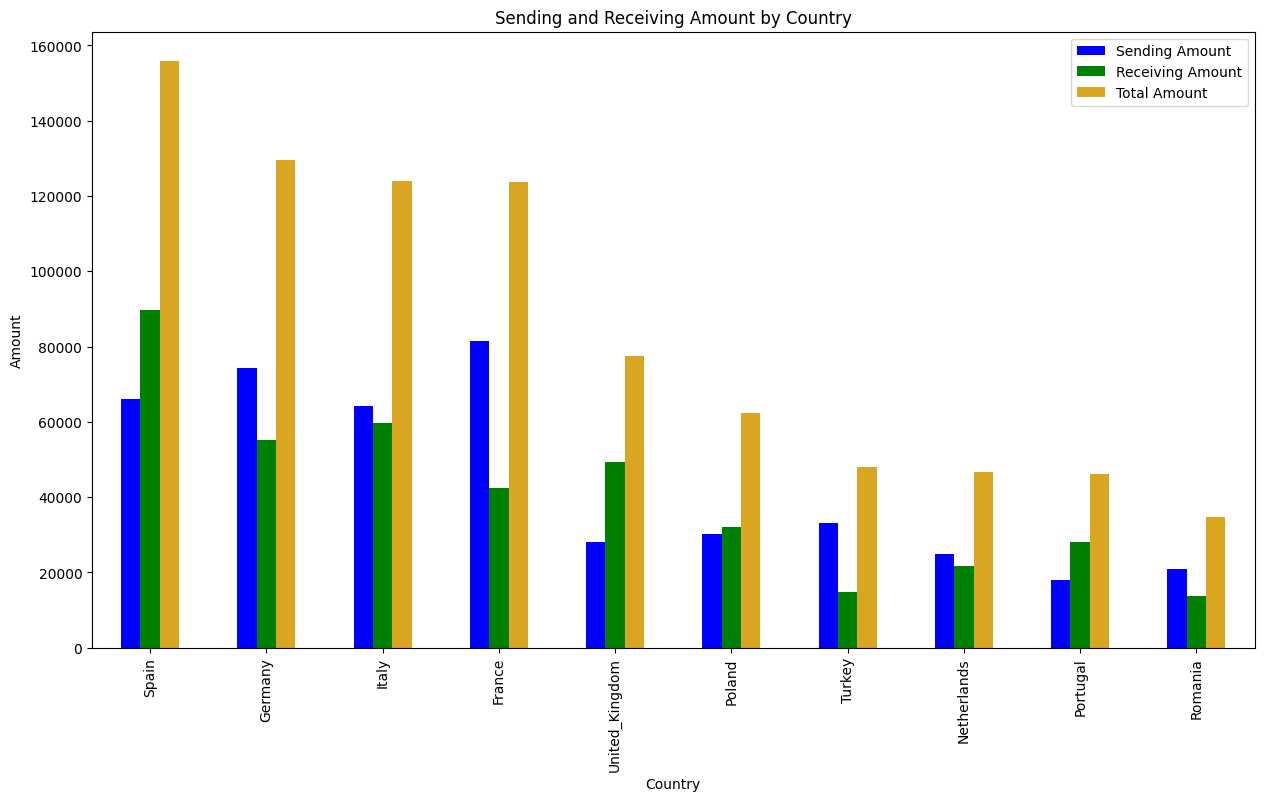

In [19]:
ax = sending_receiving.plot(kind='bar', figsize=(15, 8), rot=0,color=['Blue','Green','goldenrod'])
ax.set_title('Sending and Receiving Amount by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

Eventually, we can now see that the country with the most total exchanges is Spain, especially thanks to all the students that they receive. As we said before the hot weather, the sun and the night life are the main reasons of why students like tp go there for their Erasmus. 

Then we have Germany, Italy and France that have almost the same numbers of Erasmus students. Germany and Italy send and receive almost the same number of students, but their is a great difference for France. They send a lot more of students that they receive, and that is because people go to study in France for the good reputation of the universities and for the culture. But it is quite expensive for students to go live there.

Since the Brexit, the United Kingdom keeps going down the ranks because it is becoming more dfficult to go study there and the scholarships are also becoming harder to get. 

Text(0.5, 1.0, 'Special Needs %')

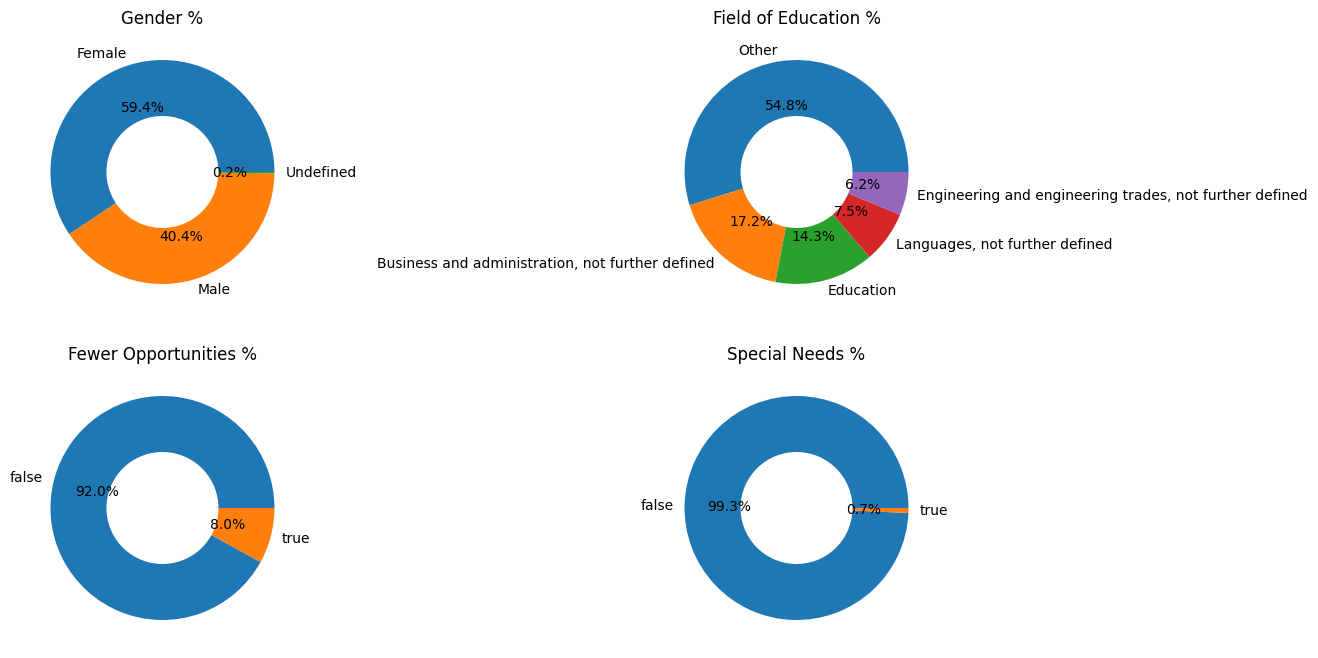

In [20]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches([15, 8])

# Gender 
gender = erasmus_df['Participant Gender'].value_counts()
axs[0, 0].pie(gender.values,
              labels = gender.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0, 0].set_title('Gender %')

# Field of education
FieldofEducation = erasmus_df['Field of Education'].value_counts().head(5)
axs[0,1].pie(FieldofEducation.values,
              labels = FieldofEducation.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0,1].set_title('Field of Education %')

# Fewer Opportunities
FewerOpportunities = erasmus_df['Fewer Opportunities'].value_counts()
axs[1,0].pie(FewerOpportunities.values,
              labels = FewerOpportunities.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1,0].set_title('Fewer Opportunities %')

# Special Needs
SpecialNeeds = erasmus_df['Special Needs'].value_counts()
axs[1, 1].pie(SpecialNeeds.values,
              labels = SpecialNeeds.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1, 1].set_title('Special Needs %')


People that go on Erasmus are 60% women, but we don't really have a reason why they are going more than man. In terms of study sectors, they are 17% to study business and administration, 14% in education and 7% in languages. Going abroad for thoses kind of studies is really understandable, especially for studiang languages.

We count 8% of students with fewer opportunity. They are people who, for economic, social, cultural, geographical or health reasons, or for reasons such as disability and educational difficulties, face obstacles that prevent them from having effective access to opportunities under the programme. The number of fewer opportunity students keeps going up each year which is a good sign of inclusivity.

And we only have 1% of students with special need. This number is very low because it is really complicated to follow a person with speicific specila needs in another country. You need a lot of people and special equipements to take care of the student, and doing so in a foreign country is very difficult.

### 2. Cost of living analysis

We are going to study the cities and countries that are present in the previous dataset for Erasmus destinations, and see if there are characteristic that are more or less favorable for exchanges. 

In [21]:
# Get only the lines with apartment and salary not null
cofRatio = cof[cof['Net Salary'].isna()==False]
cofRatio['Ratio Apart/Sal'] = cofRatio['Apartment']/cofRatio['Net Salary']*100

# Take out corrupted values
cofRatio = cofRatio[(cofRatio['Ratio Apart/Sal']<100) & (cofRatio['Ratio Apart/Sal']>10)]

cofRatio.sort_values(by='Ratio Apart/Sal',ascending=True)

,City,Country,McDo,Bread,Cheese,Bar Beer,Market Wine,Cappucino,Cigarettes,Basics,Apartment,Net Salary,Ratio Apart/Sal
2396,Jendouba,Tunisia,1.55,0.08,5.42,0.62,2.32,0.67,1.24,23.70,46.47,463.25,10.031301
1121,Wuppertal,Germany,8.43,1.58,10.75,3.69,4.16,3.64,8.06,201.77,368.81,3628.40,10.164535
3220,Jekabpils,Latvia,5.27,1.03,7.90,2.11,5.27,2.11,4.16,149.28,105.37,1001.06,10.525843
3263,Visaginas,Lithuania,6.32,0.95,6.32,2.63,6.32,2.11,4.21,195.42,105.37,957.85,11.000679
2429,Gafsa,Tunisia,1.70,0.08,6.82,0.77,3.72,0.37,2.17,25.17,55.76,495.66,11.249647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,Cascais,Portugal,7.38,1.27,8.28,2.11,6.31,1.98,5.37,134.14,1113.96,1138.04,97.884081
12,Cairo,Egypt,4.07,0.52,3.28,1.63,8.14,1.75,2.03,26.53,196.83,200.40,98.218563
529,Monaco,Monaco,9.48,3.95,14.75,7.38,13.70,4.54,10.54,184.18,5490.31,5589.37,98.227707
620,Malang,Indonesia,3.11,0.97,6.15,2.48,10.21,0.89,1.94,43.75,205.26,207.42,98.958635


With this new colomn, we can see that the lower the number is, the more money you have depending from your salary and the apartment price. Usually Erasmus students don't work during their exchange, but we are going to use this number to know how expensive is the life in the country, and if it has an influence for students.

In [22]:
# Per country
cofRatio[['Country','Ratio Apart/Sal']].groupby('Country').mean().sort_values(by='Ratio Apart/Sal',ascending=True).head()

,Ratio Apart/Sal
Country,
Angola,15.425156
South Korea,17.867708
Liechtenstein,19.384336
Isle Of Man,23.020072
Greenland,23.333349


We cab see that we don't really have european countries in Erasmus in that list. So we now are only going to study the top 5 of Erasmus countries in terms of number of exchange students.

In [23]:
# Top 5 Erasmus country 
cofRatioTop5 = cofRatio[cofRatio['Country'].isin(topErasmusCountry)]
cofRatioTop5

,City,Country,McDo,Bread,Cheese,Bar Beer,Market Wine,Cappucino,Cigarettes,Basics,Apartment,Net Salary,Ratio Apart/Sal
28,London,United Kingdom,8.61,1.25,7.92,7.26,11.07,4.14,15.99,299.36,2417.07,4033.84,59.919828
32,Paris,France,10.54,2.11,17.51,7.38,8.43,3.89,11.06,199.44,1365.19,2752.34,49.601067
80,Madrid,Spain,8.43,1.09,10.67,3.69,5.27,2.23,5.27,166.08,1056.14,2089.54,50.544139
120,Barcelona,Spain,9.48,1.50,12.32,3.16,6.32,2.35,5.27,170.85,1083.72,1978.23,54.782305
144,Berlin,Germany,9.48,1.70,12.69,4.21,5.90,3.37,8.43,308.30,1321.90,3158.05,41.858109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,Albertville,France,10.54,2.21,19.67,5.27,9.48,2.63,10.54,167.02,421.50,2256.77,18.677136
4609,Torrox,Spain,9.22,0.45,10.54,2.63,4.21,1.37,5.35,126.45,600.63,1317.18,45.599690
4752,Aberystwyth,United Kingdom,7.69,0.88,5.73,4.55,6.15,3.08,13.53,132.23,758.50,1599.00,47.435897
4778,Hexham,United Kingdom,8.00,1.26,7.88,2.46,9.84,3.78,12.30,166.54,602.70,2572.75,23.426295


In [24]:
# Per country
cofCountry = cofRatioTop5.drop(['City','Net Salary'],axis=1).groupby('Country').mean()
cofCountry.sort_values(by='Bar Beer',ascending=True).head(10)

,McDo,Bread,Cheese,Bar Beer,Market Wine,Cappucino,Cigarettes,Basics,Apartment,Ratio Apart/Sal
Country,,,,,,,,,,
Spain,7.897273,1.090182,10.980545,2.589273,5.157636,1.762364,5.465091,125.307037,641.352364,39.689270
Germany,8.822796,1.826848,12.319663,3.908804,5.456304,3.126413,7.638804,242.013441,727.958172,28.704694
Italy,8.515100,1.683030,13.328351,4.598600,5.586364,1.535200,6.012626,186.211919,568.469700,37.612711
United Kingdom,7.252653,1.230102,7.395918,4.937143,8.792449,3.559592,14.488367,221.217216,996.684082,37.731066
France,9.503214,1.610926,16.277308,5.894808,7.608113,2.839259,10.449623,165.954182,701.697719,29.538679


We saw before that the ranking of receiving countries is Spain, Italy, United Kingdom, Germany and France.
Here we have the countries ordered by the cheapest beer. But as we look at all the other prices in that tab, we cannot have a clear schema on what makes the difference between each countries. Indeed, we don't have the same rank as the one before. 

So for the moment we can only say that student don't chooses their destination based on those prices assets. We then have to look at more characteristics to try to understand how their choices are made.

### 3. University Ranking analysis

In [25]:
tempUni = list(receivingUni.index)
print("Top 5 receiving univerisities",tempUni)

tempUniFinal=[]
for u in tempUni: # Only get the city of the uni (taking the last word)
    u = u.split("_")
    tempUniFinal.append(u[-1])
print("Citites of thoses 5 univerisities",tempUniFinal)

rank2019[rank2019['name'].str.contains('|'.join(tempUniFinal))]

Top 5 receiving univerisities ['Europass_Srl', 'Universitat_De_Valencia', 'Alma_Mater_Studiorum_Universita_Di_Bologna', 'Universidade_De_Lisboa', 'Universidad_De_Granada']
Citites of thoses 5 univerisities ['Srl', 'Valencia', 'Bologna', 'Lisboa', 'Granada']


,rank,name,rank_range,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
179,180,University_of_Bologna,1-200,54.70,51.2,32.6,82.7,43.9,49.2,Italy,"66,998",23.9,11%,57 : 43,14
496,497,University_of_Valencia,401-600,39.35,28.0,19.6,68.0,36.3,44.9,Spain,"50,927",16.7,11%,62 : 38,24
660,661,University_of_Granada,601-800,29.70,23.5,19.0,48.3,35.0,47.0,Spain,"52,989",14.9,10%,57 : 43,14
740,741,Polytechnic_University_of_Valencia,601-800,29.70,25.4,12.0,45.2,44.5,47.5,Spain,"21,945",9.4,13%,38 : 62,-24


If we try to look at the ranking of the universities with the most receiving students, we can see that they are not the best ones in the world according to that dataset. It is not very surprising to see this because usually people don't go to Erasmus in order to have a good univerisity, but rather for the country or the city. And this result confirms that first thought. But if we were looking at the double degree first choices universities, the result would be different of course.

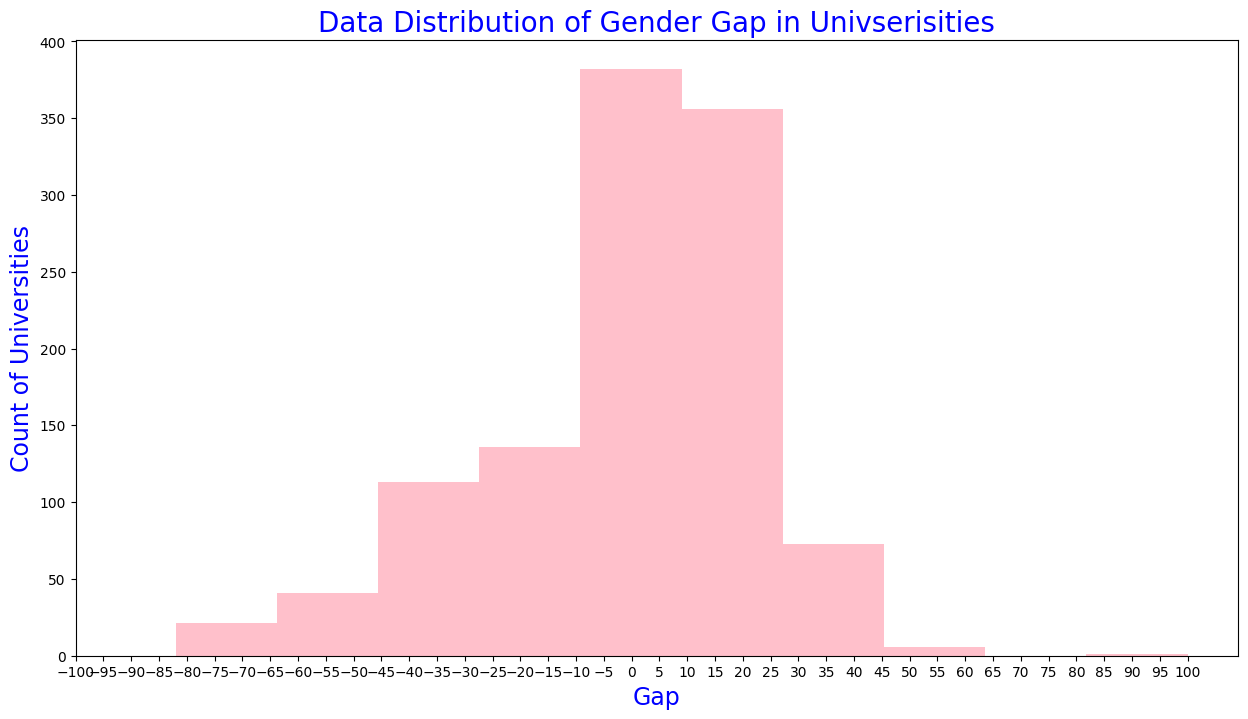

In [26]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])

axs.hist(rank2019['genderGap'],color="pink")

axs.set_title("Data Distribution of Gender Gap in Univserisities", color="blue",fontsize=20)
axs.set_xticks([i for i in range(-100,105,5)])
axs.set_xlabel("Gap", color="blue", fontsize=17)
axs.set_ylabel("Count of Universities", color="blue", fontsize=17)

plt.show()

If we look at the gender distribution in this dataset, whene we have a negative result it means there are more male, and a positive result means there are more female. The global situation show that we have more positive than negative results in number of universities (between -5 and +25), but also that we have more univerisities that have more man, than universities that have more women. Now we're going to lokk at the same data but for sorted universities.

<Axes: xlabel='Rank Range', ylabel='Gap Value'>

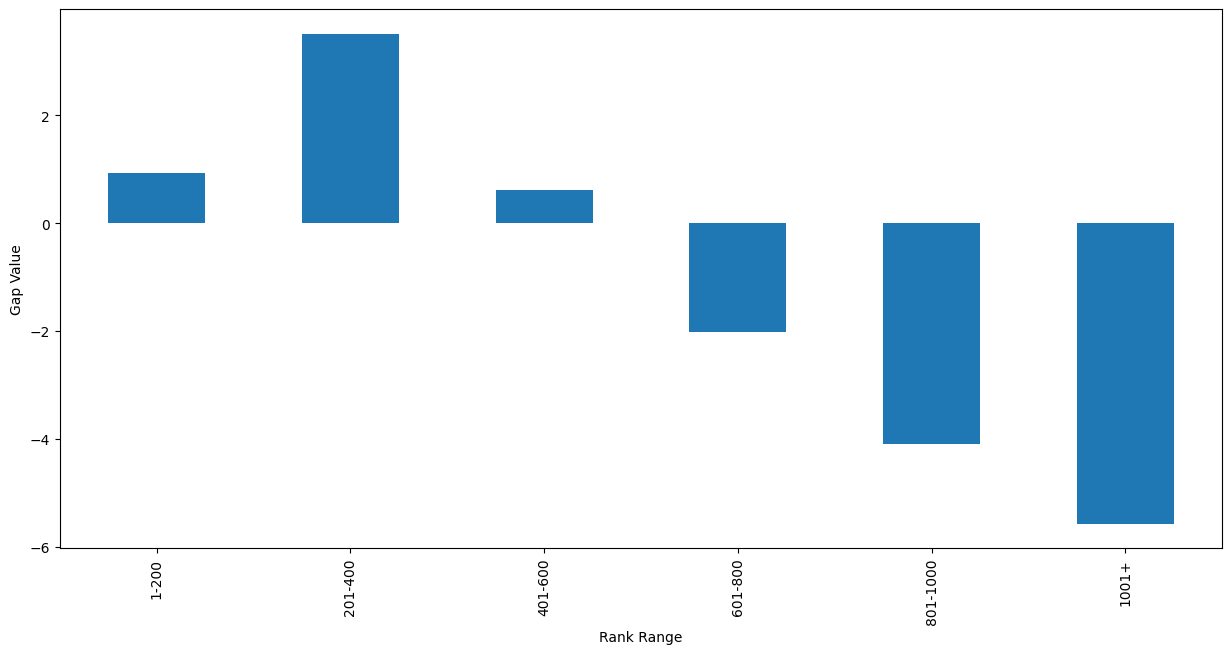

In [27]:
rank2019Range = rank2019[['rank_range','genderGap']].groupby('rank_range').mean()
rank2019Range.loc[len(rank2019Range)] = rank2019Range.loc['1001+']
rank2019Range=rank2019Range.drop('1001+')
rank2019Range = rank2019Range.rename(index={6:'1001+'})

rank2019Range['genderGap'].plot(kind='bar',xlabel='Rank Range',ylabel='Gap Value',figsize=(15,7))

We see here that the top 200 and between 400 and 600 have a very nice repartition between man and women, with only 1% of difference. The universitites between the 200 and 400 place have more women, around 3% more. But then, the farther we go down the rank and the more men disparities we have in the universities. Maybe the 60-40% gender gap of peope going to Erasmus can find its explaination here because lower univerisitis have less possibilities to have exchange programs; and since we have more men in thoses universities, it could be why we have this exchange gender gap.

<Axes: title={'center': 'Top 10 Countries with most universities in the top 100'}, xlabel='location'>

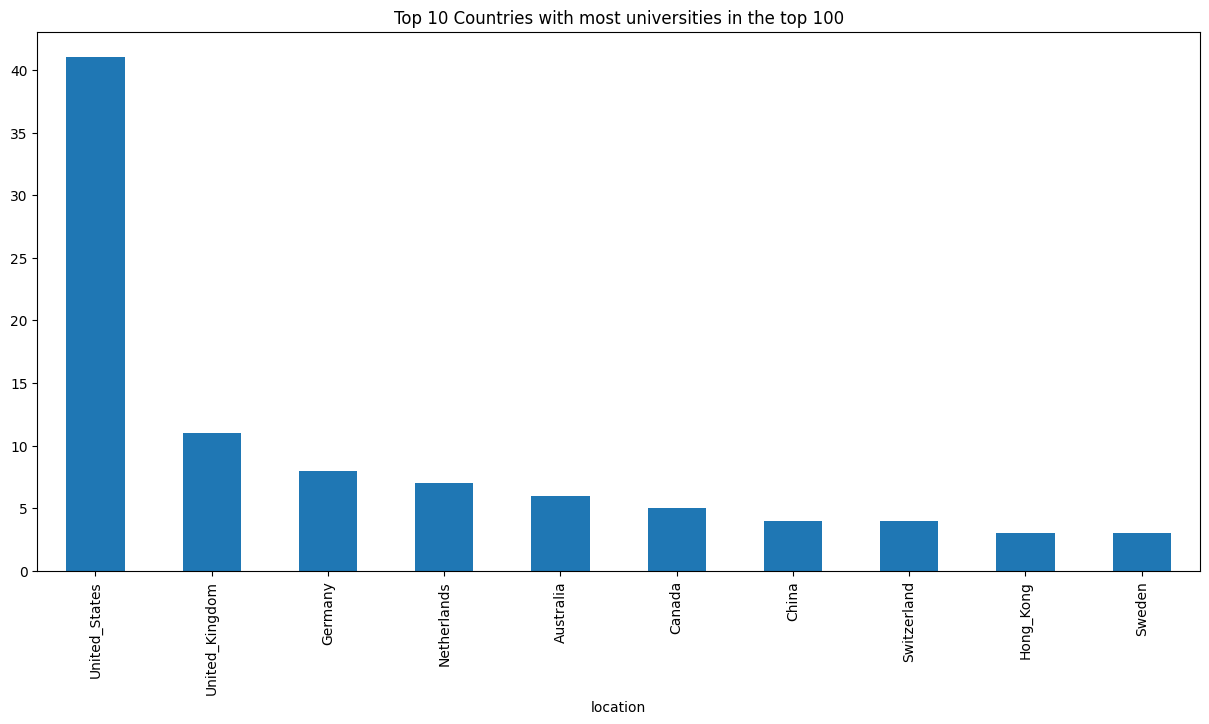

In [28]:
topCountryUni=rank2019.head(100).groupby('location').count().sort_values(by='rank',ascending=False).head(10)
topCountryUni['rank'].plot(kind='bar',figsize=(15,7),title='Top 10 Countries with most universities in the top 100')

If we look at the top 100 univerisites in the world, we clearly see that the USA have the most universities in that ranking. Then we have the UK, Germany and the Netherlands. Once again, Spain is not in that ranking, which confirms the fact that students in Erasmus don't go to the Spain to have a good study semester level.

## III. Cross data analysis

In [29]:
tempCity,tempCountry=[],[]
for i in range(len(receivingCity.index)):
    tempCity.append(receivingCity.index[i][0])
    tempCountry.append(receivingCity.index[i][1])
    
cofRatio[(cofRatio['City'].isin(tempCity)) & (cofRatio['Country'].isin(tempCountry))]

,City,Country,McDo,Bread,Cheese,Bar Beer,Market Wine,Cappucino,Cigarettes,Basics,Apartment,Net Salary,Ratio Apart/Sal
80,Madrid,Spain,8.43,1.09,10.67,3.69,5.27,2.23,5.27,166.08,1056.14,2089.54,50.544139
120,Barcelona,Spain,9.48,1.50,12.32,3.16,6.32,2.35,5.27,170.85,1083.72,1978.23,54.782305
144,Berlin,Germany,9.48,1.70,12.69,4.21,5.90,3.37,8.43,308.30,1321.90,3158.05,41.858109
479,Dublin,Ireland,10.01,1.87,9.25,6.32,12.64,3.79,15.81,234.35,2018.71,3177.20,63.537391


<Axes: title={'center': 'Where the French go the most'}, xlabel='Receiving Country'>

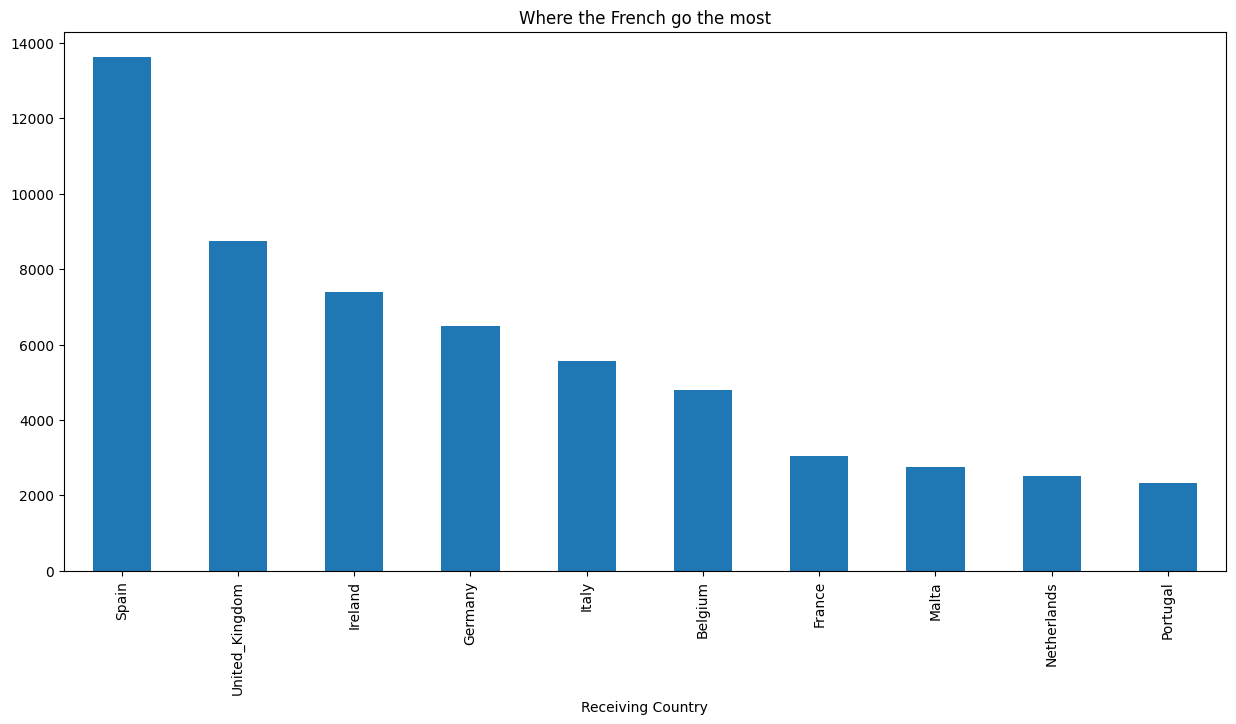

In [30]:
erasmusFR=erasmus_df[erasmus_df['Participant Nationality']=='France'].groupby('Receiving Country').count().sort_values(by='Mobility Duration',ascending=False).head(10).isStudent
erasmusFR.plot(kind='bar',title="Where the French go the most",figsize=(15,7))

In [31]:
cofFr = cof.drop('City',axis=1)
temp = cofFr[cofFr["Country"].isin(erasmusFR.index)].groupby('Country').mean().sort_values(by='Market Wine',ascending=True)

display(temp['Market Wine'].head().to_frame(),
        cofFr[cofFr["Country"].isin(erasmusFR.index)].groupby('Country').mean().sort_values(by='Bread',ascending=True).Bread.head().to_frame(),
        cofFr[cofFr["Country"].isin(erasmusFR.index)].groupby('Country').mean().sort_values(by='Cheese',ascending=True).Cheese.head().to_frame(),
        cofFr[cofFr["Country"].isin(erasmusFR.index)].groupby('Country').mean().sort_values(by='Cigarettes',ascending=True).Cigarettes.head().to_frame())

,Market Wine
Country,
Portugal,4.216667
Spain,5.150179
Germany,5.422800
Italy,5.762941
Netherlands,6.103714


,Bread
Country,
Spain,1.083571
Portugal,1.172333
Malta,1.198889
France,1.616182
Italy,1.674804


,Cheese
Country,
Portugal,7.619667
Ireland,8.671667
Malta,10.006667
Spain,10.978036
Netherlands,11.339444


,Cigarettes
Country,
Portugal,5.280667
Spain,5.480357
Italy,6.037255
Malta,6.061667
Belgium,7.603750


If we take the cliché of the French student who likes wine, bread, cheese and cigarettes, his perfect destination should be Portugal since this is the country in Europe with those cheapest products. However, Spain is at a close second place, so we can understand why French student go there. But it is surprising to see Portugal so far in the ranking. 

##### *Cross data conclusion*

After studying the multiple criterias influencing on the exchanges, we can see that :
- Students do not take the ranking of the receiving university as their first criteria 
- We have four main coutries (Spain, Germany, France and Italy) that are on top of the number of exchange students, then the other countries are a lot behind
- People go to Spain and Portugal for the weather, the night life and the cheap food and drink
- Students go to France and Italy for the country culture, the good food (not because it is cheap) and the many different landscapes
- Germany and UK are the destinations wanted for their universities and the English training


## IV. RDF Transformation

In [32]:
import pandas as pd
import rdfpandas

# Load the required libraries
from rdflib import Graph, Literal, RDF, URIRef, Namespace, RDFS
# rdflib knows about some namespaces, like FOAF
from rdflib.namespace import FOAF, XSD, OWL

import re

# Initialize RDF graph
g = Graph()

ERASMUS = Namespace("http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/")

# Bind the namespaces to a prefix for more readable output
g.bind("foaf", FOAF)
g.bind("erasmus-ontology", ERASMUS)

In [33]:
#Creating the ontology
#Datatype properties
g.add((FOAF.gender, RDF.type, OWL.DatatypeProperty))
g.add((FOAF.age, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.isStudent, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.SpecialNeeds, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.FewerOpportunities, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.FieldOfStudy, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.Duration, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfAppartment, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfBarBeer, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfBasics, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfCappucino, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.CostOfMcDo, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.Rank, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.GenderGap, RDF.type, OWL.DatatypeProperty))
g.add((ERASMUS.Score, RDF.type, OWL.DatatypeProperty))

#Object properties
g.add((ERASMUS.hasNationality, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasCitizen, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasMobility, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasSendingOrganization, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.isInReceivingOrganization, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasReceivingOrganization, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasStudent, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.isSituatedIn, RDF.type, OWL.ObjectProperty))
g.add((ERASMUS.hasLocation, RDF.type, OWL.ObjectProperty))

#Classes
g.add((ERASMUS.City, RDF.type, OWL.Class))
g.add((ERASMUS.Country, RDF.type, OWL.Class))
g.add((ERASMUS.Mobility, RDF.type, OWL.Class))
g.add((ERASMUS.Organization, RDF.type, OWL.Class))
g.add((ERASMUS.Staff, RDF.type, OWL.Class))
g.add((ERASMUS.Student, RDF.type, OWL.Class))

<Graph identifier=Nd2c4a46265cd42b78fd42a405ca34fa7 (<class 'rdflib.graph.Graph'>)>

In [34]:
# Iterate over the rows 100000 to 200000 in the DataFrame
for index, row in erasmus_df.head(170000).iterrows():
    # Create the node
    if row['isStudent'] == 'true':
        Person = URIRef(ERASMUS[f"Student/{index}"])
        g.add((Person, RDF.type, ERASMUS.Student))
    else:
        Person = URIRef(ERASMUS[f"Staff/{index}"])
        g.add((Person, RDF.type, ERASMUS.Staff))

    # Add triples using store's add() method
    g.add((Person, FOAF.age, Literal(row['Participant Age'], datatype=XSD.integer)))
    g.add((Person, FOAF.gender, Literal(row['Participant Gender'], datatype=XSD.string)))
    g.add((Person, ERASMUS.SpecialNeeds, Literal(row['Special Needs'], datatype=XSD.boolean)))
    g.add((Person, ERASMUS.FewerOpportunities, Literal(row['Fewer Opportunities'], datatype=XSD.boolean)))
    g.add((Person, ERASMUS.FieldOfStudy, Literal(row['Field of Education'], datatype=XSD.string)))
    g.add((Person, ERASMUS.isStudent, Literal(row['isStudent'], datatype=XSD.boolean)))

    Country = URIRef(ERASMUS[f"Country/{row['Participant Nationality']}"])
    g.add((Country, RDF.type, ERASMUS.Country))
    g.add((Person, ERASMUS.hasNationality, Country))

    # Create URIs for organizations, cities, and countries
    SendingOrganization = URIRef(ERASMUS[f"Organization/{row['Sending Organization']}"])
    SendingCity = URIRef(ERASMUS[f"City/{row['Sending City']}"])
    
    ReceivingOrganization = URIRef(ERASMUS[f"Organization/{row['Receiving Organization']}"])
    ReceivingCity = URIRef(ERASMUS[f"City/{row['Receiving City']}"])

    Mobility = URIRef(ERASMUS[f"Mobility/{index}"])

    # Add triples for relationships
    g.add((Person, ERASMUS.hasSendingOrganization, SendingOrganization))
    g.add((SendingOrganization, RDF.type, ERASMUS.Organization))
    g.add((SendingOrganization, FOAF.name, Literal(row['Sending Organization'], datatype=XSD.string)))
    g.add((SendingOrganization, ERASMUS.isSituatedIn, SendingCity))
    g.add((SendingCity, RDF.type, ERASMUS.City))

    g.add((Mobility, RDF.type, ERASMUS.Mobility))
    g.add((Person, ERASMUS.hasMobility, Mobility))
    g.add((Mobility, ERASMUS.Duration, Literal(row['Mobility Duration'], datatype=XSD.integer)))
    g.add((Mobility, ERASMUS.isInReceivingOrganization, ReceivingOrganization))
    g.add((ReceivingOrganization, RDF.type, ERASMUS.Organization))
    g.add((ReceivingOrganization, ERASMUS.isSituatedIn, ReceivingCity))
    g.add((ReceivingCity, RDF.type, ERASMUS.City))

In [35]:
def clean_rank (rank) :
    rank = str(rank)
    cleaned_rank = re.sub('[^a-zA-Z0-9 ]', '', rank)
    cleaned_rank = re.sub('\s+', '_', cleaned_rank) 
    return int(cleaned_rank)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3547/1875048724.py:4: SyntaxWarning: invalid escape sequence '\s'
  cleaned_rank = re.sub('\s+', '_', cleaned_rank)


In [36]:
for index, row in cof.iterrows() : 
    City = URIRef(ERASMUS[f"City/{clean_name(row['City'])}"])
    Country = URIRef(ERASMUS[f"Country/{clean_name(row['Country'])}"])
    g.add((City, RDF.type, ERASMUS.City))
    g.add((City, ERASMUS.isSituatedIn, Country))
    g.add((Country, RDF.type, ERASMUS.Country))
    
    g.add((City, ERASMUS.CostOfAppartment, Literal((row['Apartment']))))
    g.add((City, ERASMUS.CostOfMcDo, Literal((row['McDo']))))
    g.add((City, ERASMUS.CostOfBarBeer, Literal((row['Bar Beer']))))
    g.add((City, ERASMUS.CostOfCappucino, Literal((row['Cappucino']))))
    g.add((City, ERASMUS.CostOfBasics, Literal((row['Basics'])))) 


In [37]:
#For orgatization present in the Erasmus dataset as receiving organization, we associate ranking data
for index, row in rank2019.iterrows() :
   University = URIRef(ERASMUS[f"Organization/{row['name']}"])
   g.add((University, RDF.type, ERASMUS.Organization))
   g.add((University, ERASMUS.Rank, Literal(clean_rank(row['rank']), datatype=XSD.integer)))
   g.add((University, ERASMUS.GenderGap, Literal(row['genderGap'], datatype=XSD.integer)))
   g.add((University, ERASMUS.Score, Literal(row['scores_overall'], datatype=XSD.double)))

In [38]:
# Print the graph in the Turtle format
print("--- saving serialization ---")
file= open('./erasmus.ttl', 'w')
file.write(g.serialize(format='turtle'))


--- saving serialization ---


195445182

## V. 10 Insightful SPARQL queries

To execute the following queries, we used GraphDB, a triplestore that allows us to query our ontology using SPARQL. We first uploaded our ontology, file ontologie-erasmus.rdf, and the data serialized by the code above in the section "RDF Transformation", file erasmus.ttl (we only exported 170000 lines of the erasmus dataset to limit charging time when testing the queries).



### 1. Number of ERASMUS participants per country

    PREFIX erasmus: <http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/>

    SELECT ?country (COUNT(?participant) AS ?participantsCount)
    WHERE {
        ?organization erasmus:hasStudent ?participant.
        ?country erasmus:hasLocation ?organization.
        ?country a erasmus:Country.
    }
    GROUP BY ?country
    ORDER BY DESC(?participantsCount)
    LIMIT 50

This query returns the number of ERASMUS participants per country, ordered by descending number of participants. We can see that Germany is the country with the most participants, followed by France and Spain.


### 2. Number of ERASMUS participants per city

    PREFIX erasmus: <http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/>

    SELECT ?city (COUNT(?participant) AS ?participantsCount)
    WHERE {
        ?organization erasmus:hasStudent ?participant.
        ?city erasmus:hasLocation ?organization.
        ?city a erasmus:City.
    }
    GROUP BY ?city
    ORDER BY DESC(?participantsCount)
    LIMIT 50

This query returns the number of ERASMUS participants per city, ordered by descending number of participants. We can see that Berlin is the city with the most participants, followed by Paris, Madrid, Barcelona and Munchen.

    

### 3. What informations do we have on the most chosen destination ?
    
    PREFIX erasmus: <http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns>

    DESCRIBE ?organizationWithMostParticipants
    WHERE {
      {
        SELECT ?organizationWithMostParticipants (COUNT(?participant) AS ?participantsCount)
        WHERE {
          ?organizationWithMostParticipants erasmus:hasStudent ?participant.
        }
        GROUP BY ?organizationWithMostParticipants
        ORDER BY DESC(?participantsCount)
        LIMIT 1
      }
    }


We now know that the most chosen destination is Aristotelio_Panepistimio_Thessalonikis with 754 participants. This organization is situated in Thessalonikis in Greece.



### 4. The most common country destination by nationality of participants

    PREFIX erasmus: <http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/>

    SELECT ?nationality ?destination ?MnbMobility
    WHERE {
    {
    SELECT ?nationality ?destination ?MnbMobility WHERE {
        {
        SELECT ?nationality ?destination (count (?mobility) as ?MnbMobility) 
        WHERE {
          ?person erasmus:hasNationality ?nationality.
          ?person erasmus:hasMobility ?mobility.
          ?mobility erasmus:isInReceivingOrganization ?organization.
          ?organization erasmus:isSituatedIn ?destination.
          ?destination a erasmus:Country.
        }
        GROUP BY ?nationality ?destination
        }
    }
    }
    {
    SELECT ?nationality (MAX(?nbMobility) as ?MnbMobility) WHERE {
        {
        SELECT ?nationality ?destination (count (?mobility) as ?nbMobility) 
        WHERE {
          ?person erasmus:hasNationality ?nationality.
          ?person erasmus:hasMobility ?mobility.
          ?mobility erasmus:isInReceivingOrganization ?organization.
          ?organization erasmus:isSituatedIn ?destination.
          ?destination a erasmus:Country.
        }
        GROUP BY ?nationality ?destination
        }
    }
        GROUP BY ?nationality
    }
    }
    GROUP BY ?nationality ?destination ?MnbMobility
    ORDER BY DESC(?MnbMobility)

Without too much surprise, we discover that French people mostly go to Spain, Spanish people, to Italy, and Germany people, to the UK.



### 5. What informations do we have on the best ranked destination ?

    PREFIX erasmus: <http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns>

    DESCRIBE ?university
    WHERE {
        ?university a erasmus:Organization.
        ?university erasmus:Rank ?rank.
        ?mobility erasmus:isInReceivingOrganization ?university
    }
    ORDER BY (?rank)
    LIMIT 1

We now know that the best ranked destination is Imperial College with a rank of 9. This university is situated in London in The UK (missing Data because Londres and not London).
This is of course not the best ranked university in the world, but the best ranked university among the ERASMUS destinations.

### 6. How much is the cost of living in each university city ?

    PREFIX erasmus: <http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema>

    SELECT ?city ?costOfLiving
    WHERE {
        ?city a erasmus:City.
        ?city erasmus:CostOfAppartment ?costOfAppartment.
        ?city erasmus:CostOfBasics ?costOfBasics.
        ?city erasmus:CostOfCappucino ?costOfCappucino.
        ?city erasmus:CostOfBarBeer ?costOfBarBeer.
        ?city erasmus:CostOfMcDo ?costOfMcDo.

        BIND((?costOfAppartment + ?costOfBasics) AS ?costOfHousing).
        BIND(((?costOfCappucino + ?costOfBarBeer + ?costOfMcDo)/3) AS ?costOfLeisure).
        BIND((?costOfHousing + 8*?costOfLeisure) AS ?costOfLiving)

        {
            SELECT ?city (AVG(?score) AS ?cityScore)
            WHERE {
                ?city a erasmus:City.
                ?organization erasmus:isSituatedIn ?city.
                ?organization erasmus:Score ?score.
            }
            GROUP BY ?city
        }
        filter (?costOfLiving != "NaN"^^xsd:double)

    }
    ORDER BY DESC(?costOfLiving)

We arbitrarily decided that the cost of living in a city is the sum of the cost of housing (rent and basics per month) and cost of leisure (2 outing per week, each costing the average cost of a cappucino, a beer or a McDo). 

The most expensive city is London, UK, though we have a mismatch as London, UK and London, Canada have the same URI and their cost of living are tangled together. We haven't found a satisfactory solution to that problem, as the ones tried tend to create worse problems. The next most expensive cities are Fairfax USA (2462$ per month), and Dublin Ireland (2307$ per month).



### 7. Is there more participants that chose to go to the city where beer is the cheapest that to the city where beer is the most expensive ?

    PREFIX erasmus: http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/
    PREFIX rdf: http://www.w3.org/1999/02/22-rdf-syntax-ns
    PREFIX xsd: http://www.w3.org/2001/XMLSchema

    ASK WHERE{
    {
    SELECT ?nbX WHERE {
    SELECT ?city ?costBeer (count (?mobility) as ?nbX)
    WHERE {
        ?city erasmus:CostOfBarBeer ?costBeer.
        ?mobility erasmus:isInReceivingOrganization ?orga.
        ?orga erasmus:isSituatedIn ?city.
            filter(?costBeer!='NaN'^^xsd:double)
    }
    GROUP BY ?city ?costBeer
    order by DESC (?costBeer)
    Limit 1
    }
    }
    {
    SELECT ?nbY WHERE {
    SELECT ?city ?costBeer (count (?mobility) as ?nbY)
    WHERE {
        ?city erasmus:CostOfBarBeer ?costBeer.
        ?mobility erasmus:isInReceivingOrganization ?orga.
        ?orga erasmus:isSituatedIn ?city.
            filter(?costBeer!='NaN'^^xsd:double)
    }
    GROUP BY ?city ?costBeer
    order by (?costBeer)
    Limit 1
    }
    }
        FILTER(?nbX < ?nbY)
    }

No ! There are more participants that chose to go to the city where beer is the most expensive that to the city where beer is the cheapest. Of course, it is probably not the only criteria that they take into account when choosing their destination, the most expesive beer city being Nice and the least expensive being Hanoi.




### 8. Average cost of cappucinos by country

    PREFIX erasmus: http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/

    SELECT ?country (AVG(?cappuccinoCost) AS ?averageCost)
    WHERE {
      ?city erasmus:isSituatedIn ?country.
      ?city erasmus:CostOfCappucino ?cappuccinoCost.
    }
    GROUP BY ?country
    ORDER BY ?averageCost


The three cities where cappucinos are the less expensive are Algeria, Tunisia and Ukraine. We can only recommend to our italian friends to prefer those destinations if they want to drink a lot of cappucinos during their ERASMUS exchange, especially considering Italy is only 36 on this list.




### 9. The field most studied in each country by ERASMUS Participants


PREFIX erasmus: <http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema>

    SELECT ?country ?fieldOfStudy ?Mnb WHERE
    {
    {
    SELECT ?country ?fieldOfStudy ?Mnb
    WHERE{
        SELECT ?country ?fieldOfStudy (count (?person) as ?Mnb)
    WHERE {
      ?person erasmus:hasMobility ?mobility.
      ?person a erasmus:Student.
      ?mobility erasmus:isInReceivingOrganization ?organization.
      ?organization erasmus:isSituatedIn ?city.
      ?city erasmus:isSituatedIn ?country.
      ?person erasmus:FieldOfStudy ?fieldOfStudy.
    }
    GROUP BY ?country ?fieldOfStudy
    }
    }

    {
    SELECT ?country (MAX(?nb) as ?Mnb)
    WHERE{
        SELECT ?country ?fieldOfStudy (count (?person) as ?nb)
    WHERE {
      ?person erasmus:hasMobility ?mobility.
      ?person a erasmus:Student.
      ?mobility erasmus:isInReceivingOrganization ?organization.
      ?organization erasmus:isSituatedIn ?city.
      ?city erasmus:isSituatedIn ?country.
      ?person erasmus:FieldOfStudy ?fieldOfStudy.
    }
    GROUP BY ?country ?fieldOfStudy
    }
    GROUP BY ?country
    }
    }
    group by ?country ?fieldOfStudy ?Mnb
    order by desc (?Mnb)
    
Most reported field of study is "Business and administration, not further defined", each seems to be a broad umbrella term, so it makes sens that it would come on top, same as "Other". Norway is the first country to differ in order of number of participants, with "Engineering and engineering trades, not further defined".



### 10. What is the ranking of the cities with the best average score of quality of education ?

    PREFIX erasmus: http://www.dei.unipd.it/database2/2023/12/erasmus-ontology/

    SELECT ?city (AVG(?score) AS ?cityScore)
    WHERE {
        ?city a erasmus:City.
        ?organization erasmus:isSituatedIn ?city.
        ?organization erasmus:Score ?score.
    }
    GROUP BY ?city
    ORDER BY DESC (?cityScore)

Ignoring London which issues has mentionned above, the best ranked city is Heidenberg with a score of 73.2.

## Data Issues

We did most of our queries on the first 1000 lines of the dataset, because it was taking too much time to convert the whole dataset. When we imported the 170000 first lines we realised that the dataset had a few issues.
First of all, the Erasmus dataset is not very well formated. For exemple lines concerning receiving countries and sending countries were inverted, meaning someone coming from Berlin had its receiving country set to its sending country which creates many unwanted connexions in the RDF data. We did see this problem on fewer lines.
Secondly, a few cities are not unique but they are created with the same IRI.
Finally, cities are sometimes called by their name in their native language, sometimes in english, sometime in the langage of the participant, which create multiple instances of the same city.
The Data comming from different dataset, it is not always easy to have matching Data.